<a href="https://colab.research.google.com/github/Aashvi123/Pythonassignments/blob/main/Python_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Final Assignment - AASHVI SHAH - 23200323**

In [ ]:
# Importing libraries and necessary packages to do the analysis in this code chunk:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error


Question 1: (a) Load the male_stud.csv dataset into Python as a pandas DataFrame.

(b) Inspect the data. How many students are included in this dataset? How many different indicators are included? Does this dataset contain any missing values?

(c) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results.

In [ ]:
# 1 a)
# Loading the dataset into a pandas DataFrame called 'males'
males = pd.read_csv('male_stud.csv')
# 1 b)
# Inspecting the data - looking at the top enteries/ observations and finding the info
print(males.head())  # Displaying the first few rows of the DataFrame
print(males.info())  # Displaying information about the DataFrame, including data types and missing values
# 1 c) Numerical Summary
# Summary statistics - For Numerical Description purposes
print(males.describe())



   large_family  lives_in_city  traveltime  studytime  failures  paid  \
0             0              1           1          2         0     1   
1             0              1           1          2         0     0   
2             0              1           1          2         0     1   
3             1              1           1          2         0     1   
4             0              1           1          1         0     1   

   activities  internet  romantic  famrel  freetime  goout  absences  \
0           1         1         0       5         4      2        10   
1           0         1         0       4         4      4         0   
2           0         1         0       4         2      2         0   
3           1         1         0       5         5      1         0   
4           1         1         0       4         3      3         2   

   final_grade  
0           15  
1           11  
2           19  
3           15  
4           14  
<class 'pandas.core.frame.

***Inference for Numerical variables:*** 187 students are included in this dataset. There are no missing vales as shown in the summary statistics. Also, students are compared based on 14 indicators.

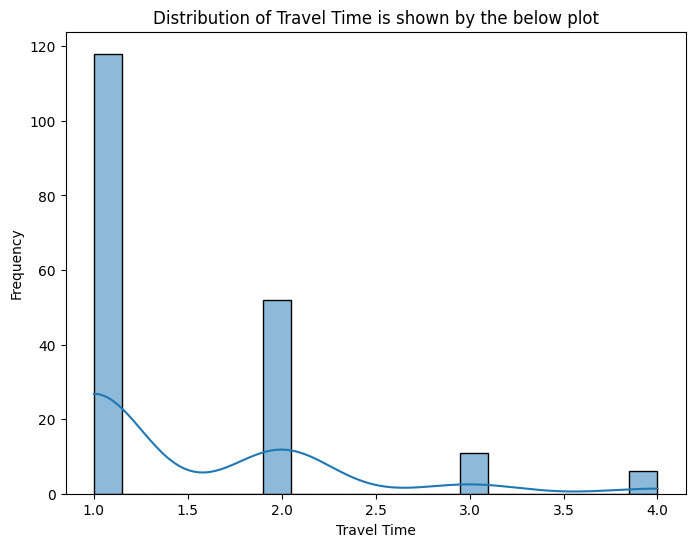

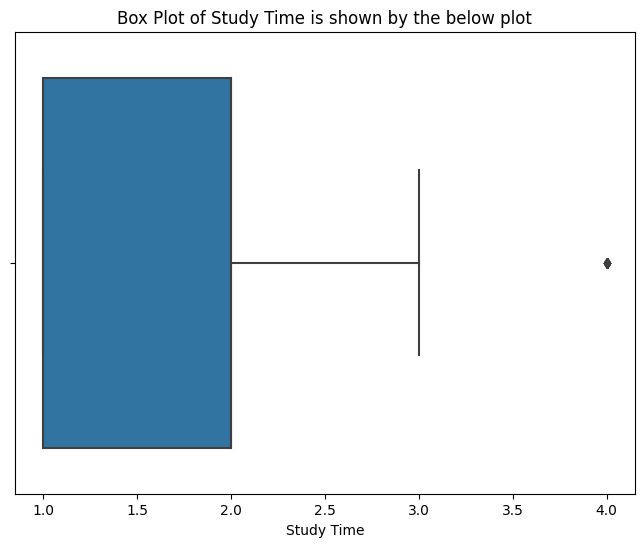

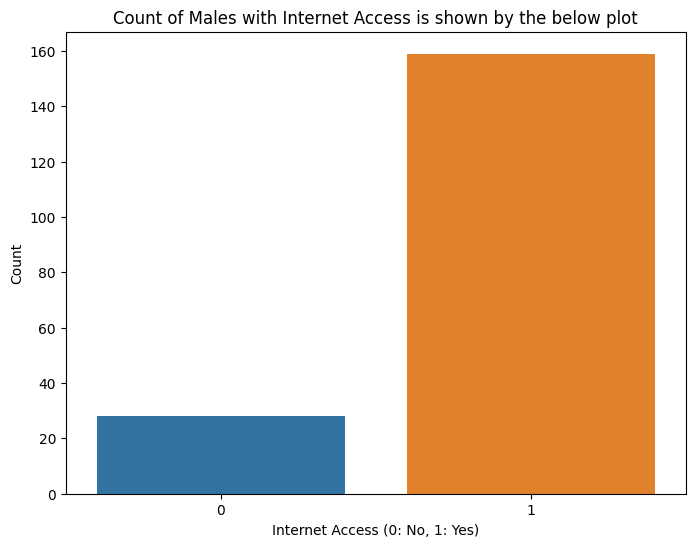

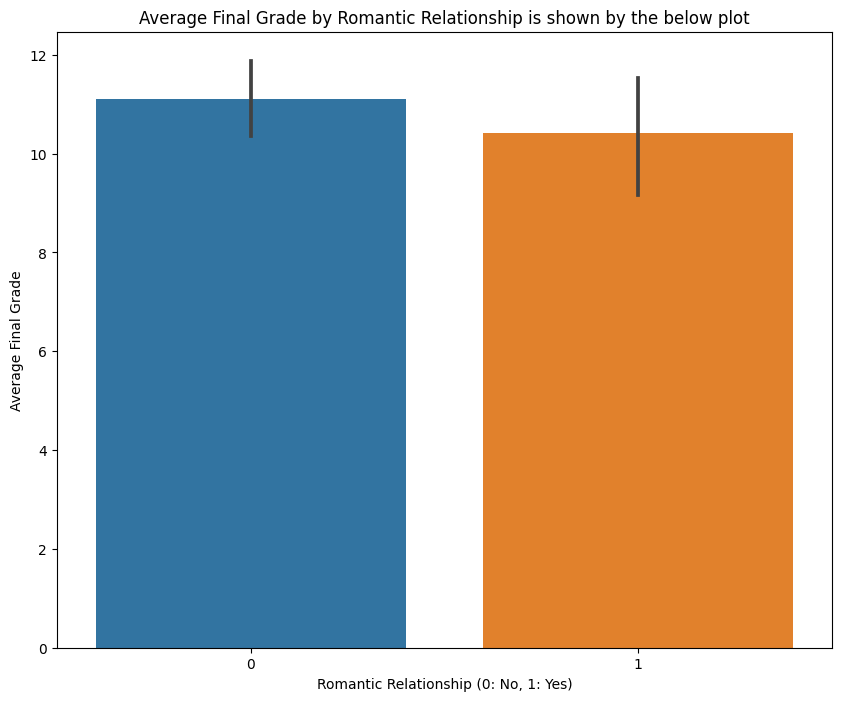

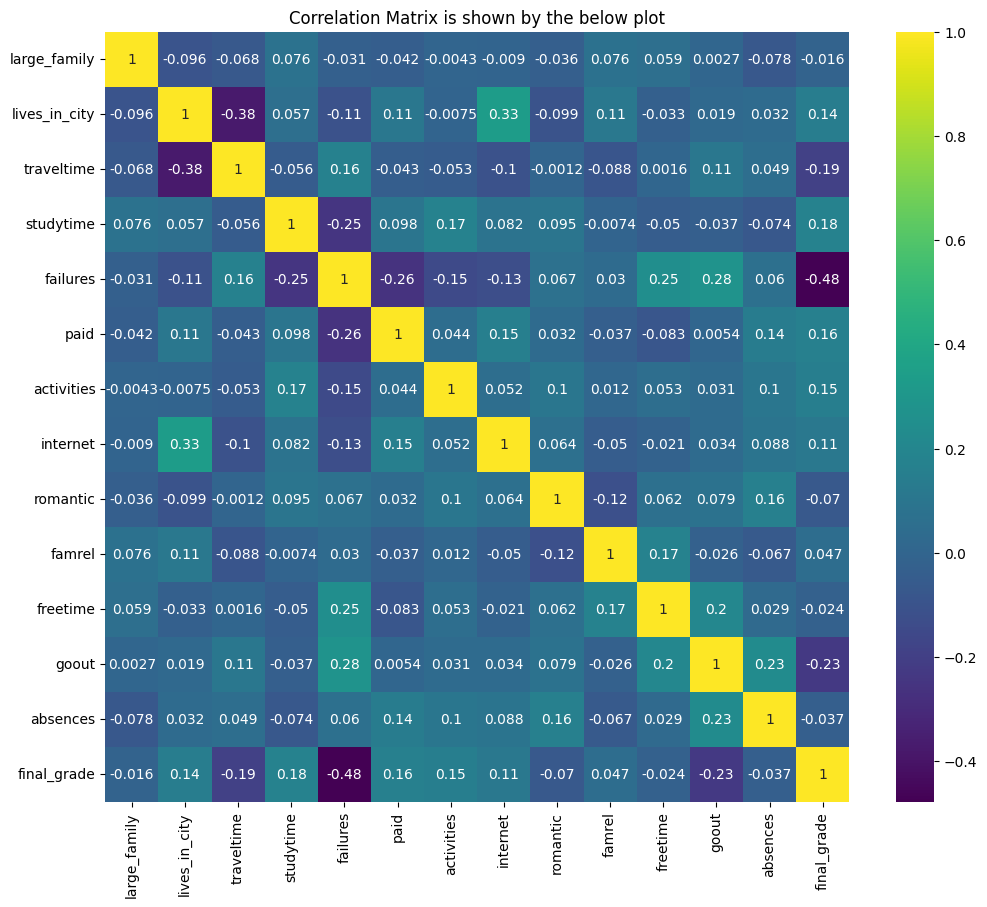

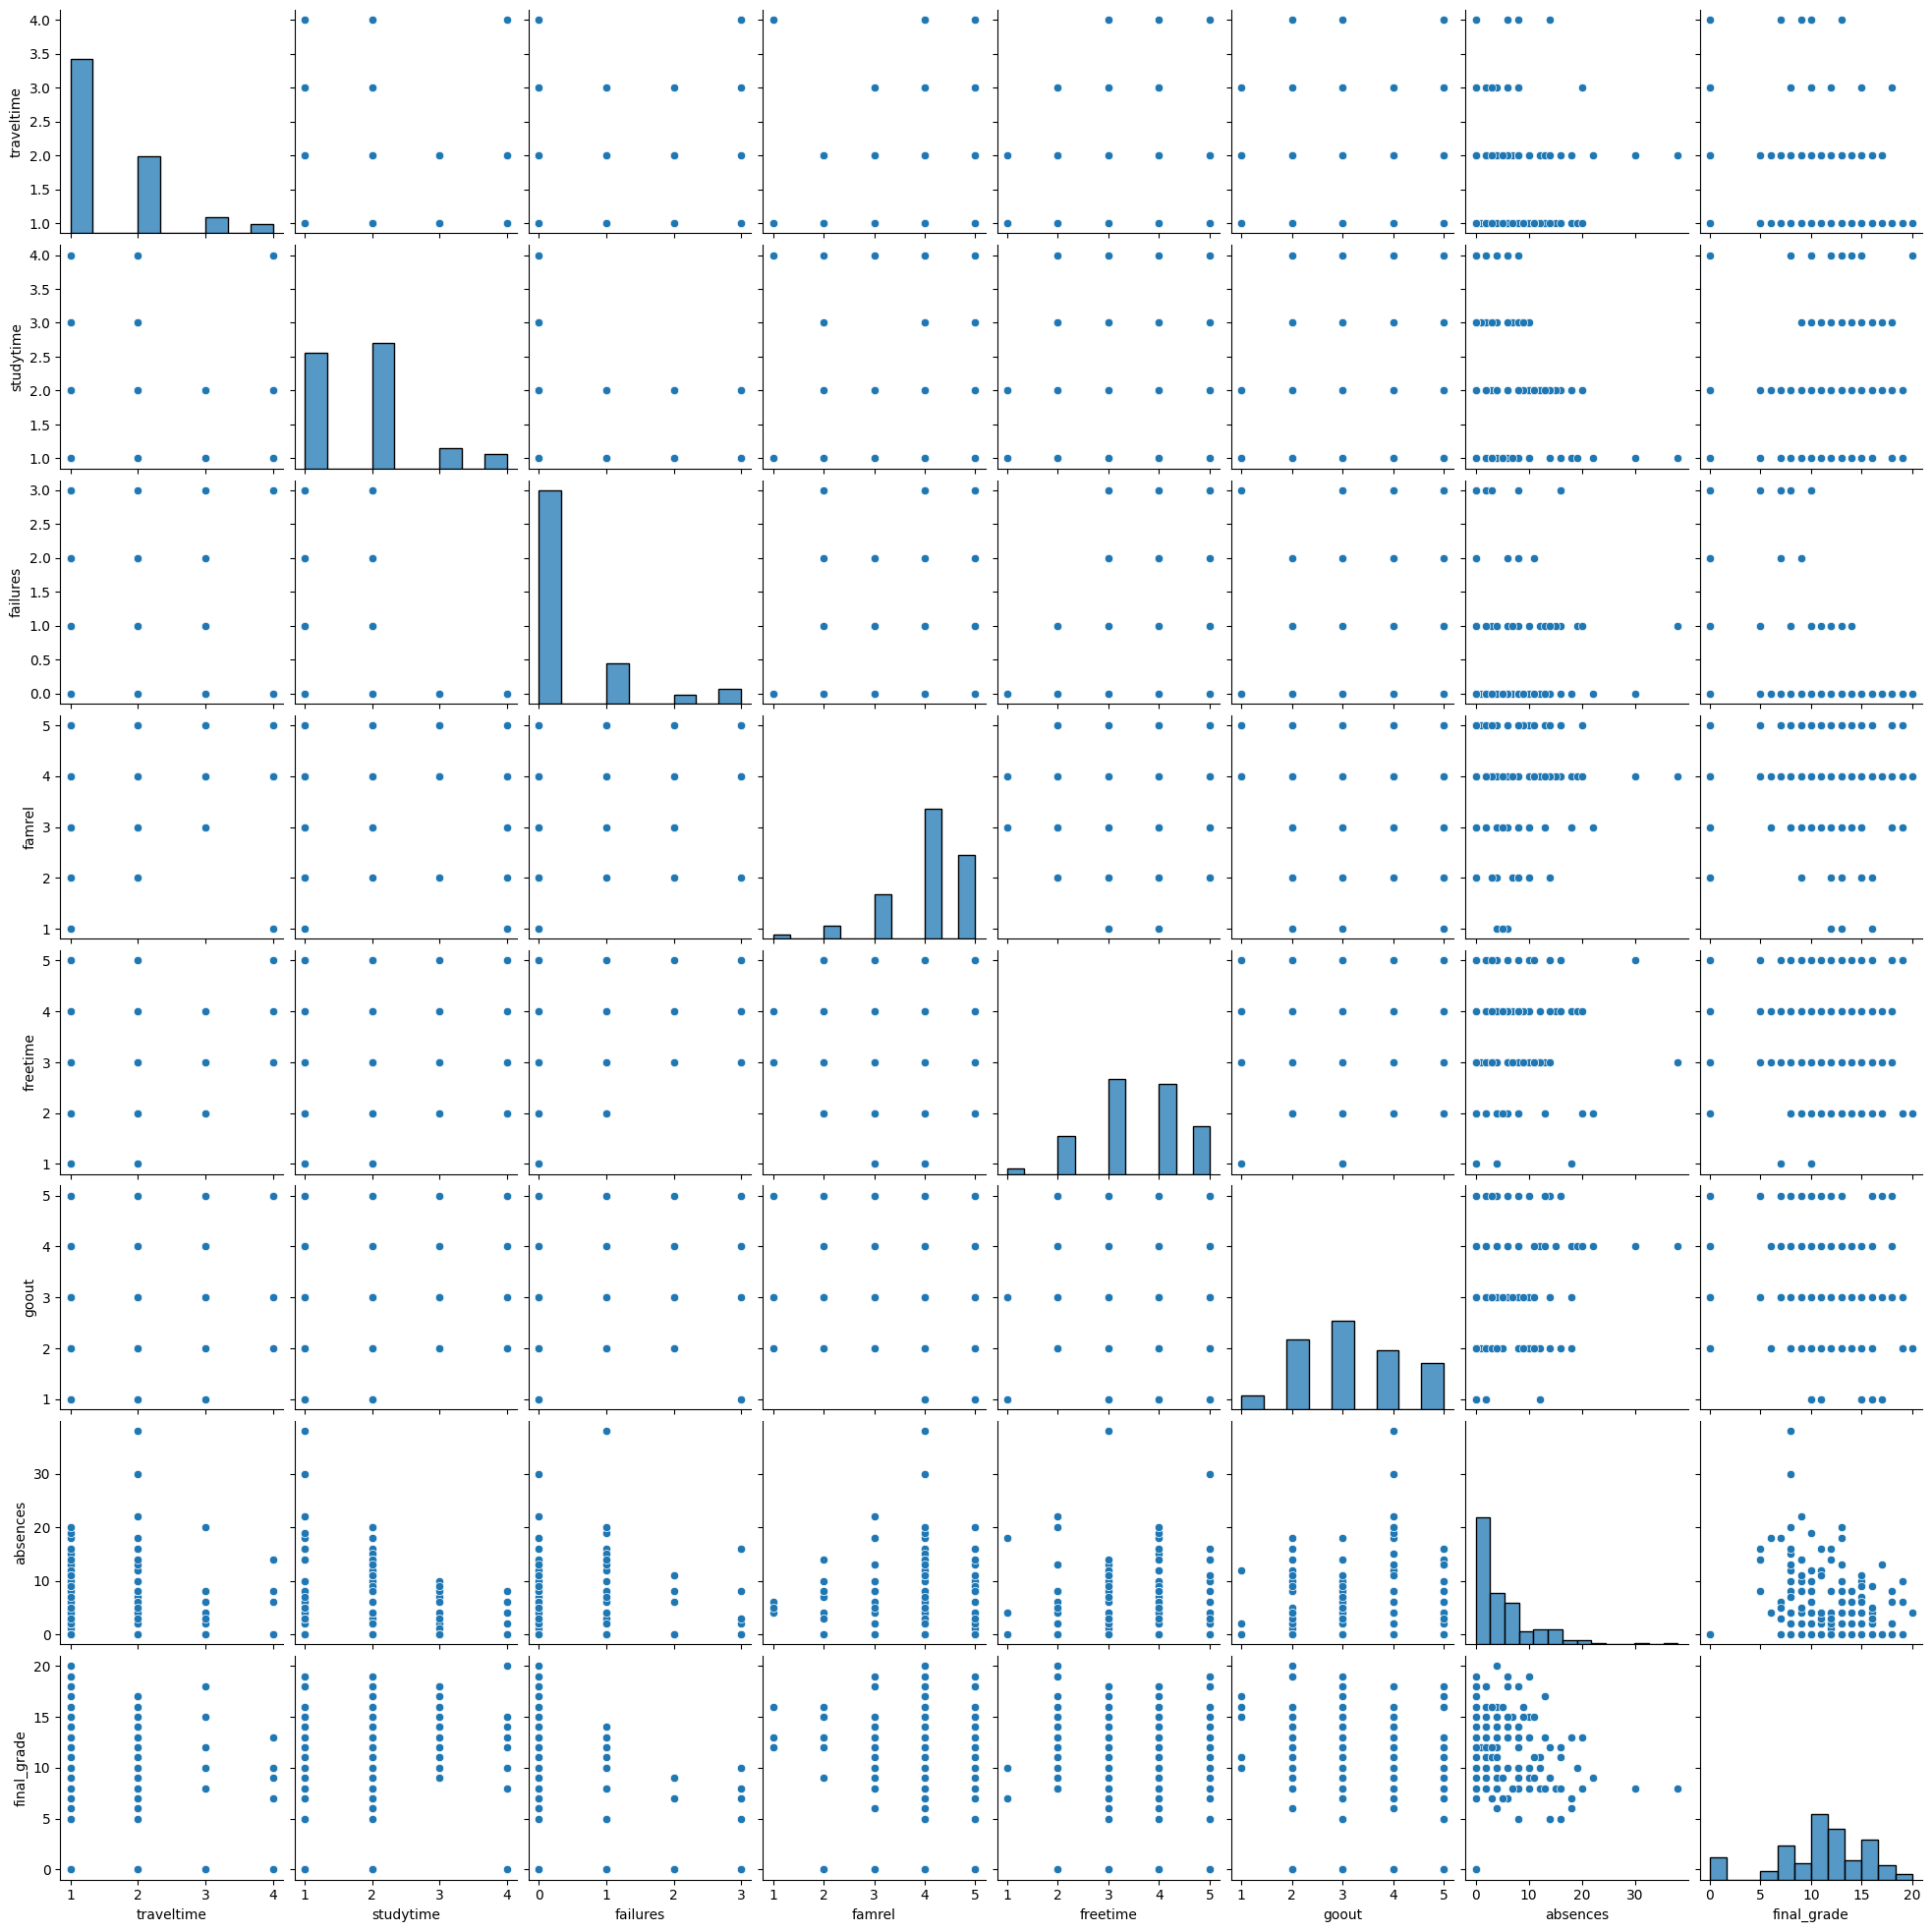

In [ ]:
# c) EDA - Visual Description
# Histogram for 'traveltime'
plt.figure(figsize=(8, 6))
sns.histplot(males['traveltime'], bins=20, kde=True)
plt.title('Distribution of Travel Time is shown by the below plot')
plt.xlabel('Travel Time')
plt.ylabel('Frequency')
plt.show()

# Box plot:'studytime'
plt.figure(figsize=(8, 6))
sns.boxplot(x=males['studytime'])
plt.title('Box Plot of Study Time is shown by the below plot')
plt.xlabel('Study Time')
plt.show()

# Count plot: 'internet'
plt.figure(figsize=(8, 6))
sns.countplot(x=males['internet'])
plt.title('Count of Males with Internet Access is shown by the below plot')
plt.xlabel('Internet Access (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Bar plot for average 'final_grade' by 'romantic' status- This is an interesting relationship to study, we are looking at whether the final grade is affected by whether a person is single or not
plt.figure(figsize=(10, 8))
sns.barplot(x=males['romantic'], y=males['final_grade'])
plt.title('Average Final Grade by Romantic Relationship is shown by the below plot')
plt.xlabel('Romantic Relationship (0: No, 1: Yes)')
plt.ylabel('Average Final Grade')
plt.show()

# Correlation matrix- measuring the relationship between variables
correlation_matrix = males.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title('Correlation Matrix is shown by the below plot')
plt.show()

# Pair plot for selected variables - extension of correlation matrix but contains plot
selected_variables = ['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'absences', 'final_grade']
sns.pairplot(males[selected_variables])
plt.show()


**Inferences for visualisations:**  
1. Distribution for travel Time: we can see that the the max frequency of travel time is recorded at 1. we don't know the unit explicity but i am assuming it is one hour. The highest travel time that we can see through the bar chart is 4 hours of travel time.
2. Box plot of study time: The median study time is somewhere around 2 hours and the max study time that was recorded was 4 hours(That is an outlier). The mean is somewhere around 1.7 hours.
3. Count of Males with Internet access: This bar chart shows the count/frequency of males with Internet access.Yes is denoted by Number 1 and the count of it is around 157 out of 187 which higher than 0(which is without internet access) which makes sense.
4. Average Final grade by romantic relationship: This graphical representation shows the relationship between relationship and the grades obtained by them. So, through the graph we can see that the people who aren't in a romantic relationship are more likely to get more average makrs than the students who are involved in a romantic relationship.
5. Correlation matrix: Every variable has low correlation with final grade but the one that has highest influence is failures that is -0.47 that in itself is not that strong but what it means is as failures inreases the final grades decreases.




Question 2:
(a) Load the female_stud.csv dataset into Python as a pandas DataFrame.


(b) Inspect the data. How many students are included in this dataset? Are the indicators the same as those in the male group?

(c) Perform a t-test, for each of the measurements, to test whether any of the indicators differ between the male and the female groups. Use a significance level of α = 0.01. Display the t-score and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.


In [ ]:
# a)
# Loading the female dataset
female_df = pd.read_csv('female_stud.csv')

# (b) Inspecting the data - we are checking the length/ dimension of the dataset and the columns that are present in the data
print(f"The dataset has {len(female_df)} students.")
print("Columns in the female dataset:")
print(female_df.columns)

# (c) Performing t-test for each measurement
male_df = pd.read_csv('male_stud.csv') # loading the males dataset again for t test
columns_to_compare = ['large_family', 'lives_in_city', 'traveltime', 'studytime', 'failures',
                       'paid', 'activities', 'internet', 'romantic', 'famrel', 'freetime',
                       'goout', 'absences', 'final_grade']

alpha = 0.01
for column in columns_to_compare:
    t_stat, p_value = ttest_ind(male_df[column], female_df[column], equal_var=False)
    print(f"\nComparison for '{column}':")
    print(f"  T-Statistic: {t_stat}")
    print(f"  P-Value: {p_value}")

    if p_value < alpha:
        print("Rejecting the null hypothesis (there is a significant difference)")
    else:
        print("Failing to reject the null hypothesis (no significant difference)")


The dataset has 208 students.
Columns in the female dataset:
Index(['large_family', 'lives_in_city', 'traveltime', 'studytime', 'failures',
       'paid', 'activities', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'absences', 'final_grade'],
      dtype='object')

Comparison for 'large_family':
  T-Statistic: -1.7807173599000137
  P-Value: 0.07575887099006692
Failing to reject the null hypothesis (no significant difference)

Comparison for 'lives_in_city':
  T-Statistic: -0.5641546398235752
  P-Value: 0.5729774466287478
Failing to reject the null hypothesis (no significant difference)

Comparison for 'traveltime':
  T-Statistic: 1.1766488493992366
  P-Value: 0.24009406424460641
Failing to reject the null hypothesis (no significant difference)

Comparison for 'studytime':
  T-Statistic: -6.370895557447293
  P-Value: 5.345128657010921e-10
Rejecting the null hypothesis (there is a significant difference)

Comparison for 'failures':
  T-Statistic: 0.87635735983746
  P-Valu

Inference: In summary, the analysis of the dataset comprising 208 female students revealed several insights.
Yes, the dataset has the same variables in the male student dataset.Significant differences were found in study time and free time, suggesting potential influences on academic performance. Conversely, attributes such as family size, city residence, travel time, failures, payment for extra classes, participation in activities, internet access, romantic relationships, family relations, social outings, absences, and final grades showed no statistically significant differences among female students.

Question 3: (a) Combine the two datasets into a single DataFrame.


(b) Compute the Pearson correlation coefficient between each of the measurements and identify which indicators are most correlated. List the four most strongly correlated pairs.

(c) Create scatter plots for the each of the correlated pairs identified in Q3(b). Are the relation- ships as expected from the correlation coefficients?
The full dataset should be used for all subsequent questions.


Four most strongly correlated pairs:
      level_0        level_1  correlation
151  freetime          goout     0.285019
99   internet  lives_in_city     0.216842
73       paid      studytime     0.167220
176  absences       romantic     0.153384


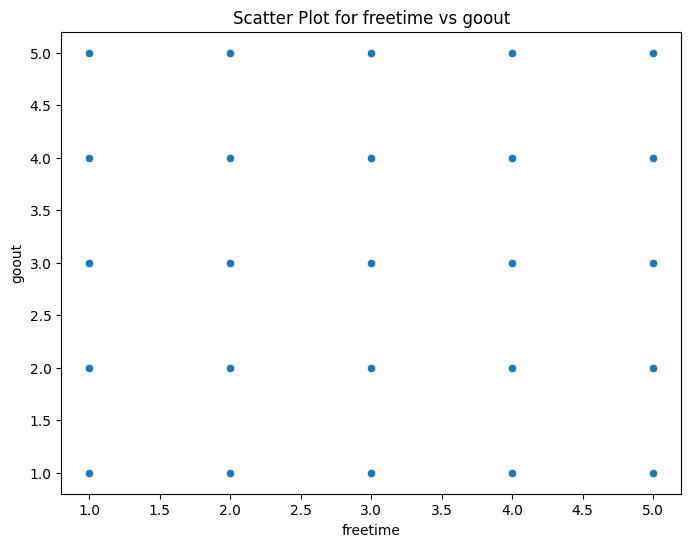

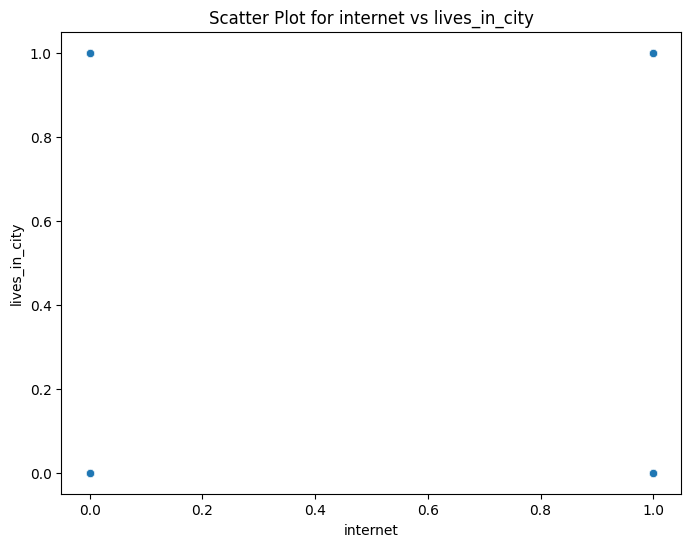

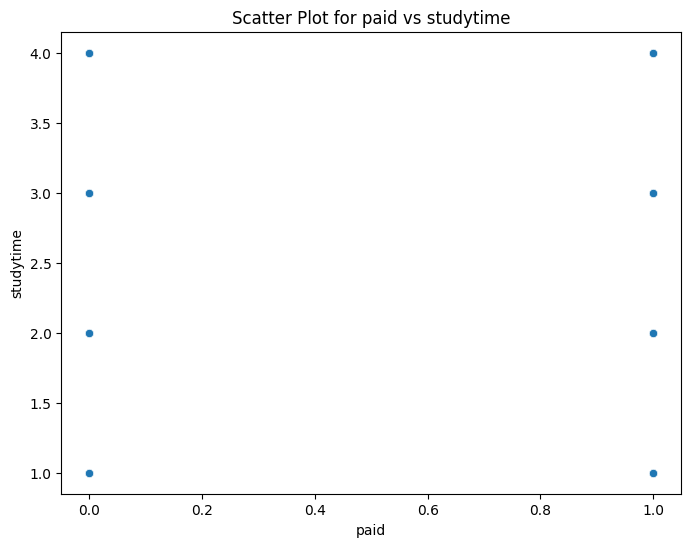

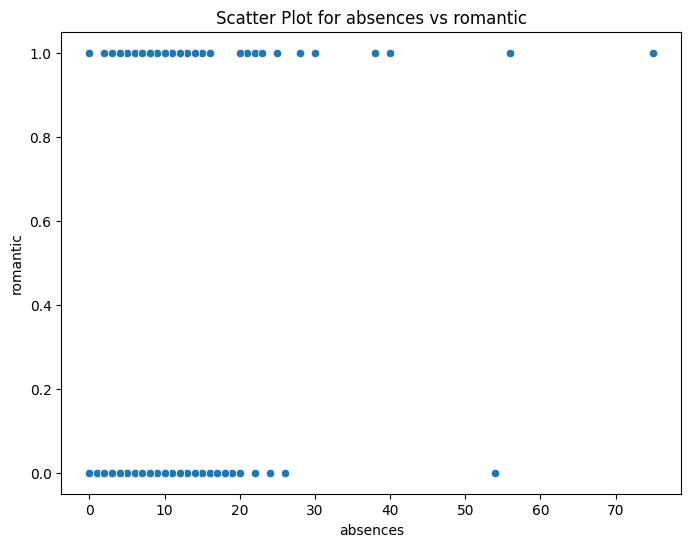

In [ ]:

# (a) Combining the two datasets into a single DataFrame for our further analysis
male_df = pd.read_csv('male_stud.csv')
female_df = pd.read_csv('female_stud.csv')
combined_df = pd.concat([male_df, female_df], ignore_index=True) ## concatenated dataframe

# (b) Computing the Pearson correlation coefficient
correlation_matrix = combined_df.corr() # chceking the pearson's correlation

# Identifying the four most strongly correlated pairs for our study
correlation_pairs = (correlation_matrix ## this makes a correlation matrix
                     .stack()
                     .reset_index()
                     .rename(columns={0: 'correlation'})
                     .sort_values(by='correlation', ascending=False)
                     .query('level_0 < level_1'))  # Excluding self-correlations

top_correlated_pairs = correlation_pairs.head(4)
print("Four most strongly correlated pairs:")
print(top_correlated_pairs)

# (c) Creating scatter plots for each of the correlated pairs as shown below:
for index, row in top_correlated_pairs.iterrows(): ### for loop introduction
    indicator1, indicator2 = row['level_0'], row['level_1']

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=combined_df, x=indicator1, y=indicator2)
    plt.title(f'Scatter Plot for {indicator1} vs {indicator2}')
    plt.xlabel(indicator1)
    plt.ylabel(indicator2)
    plt.show()


Inference: They relationship between these four strongest pair is not that strong as well.
We can say this because there is no trend that is visible clearly in the plots shown above. All the points are scattered in a haphazard form


Question 4: (a) In the Portuguese system a grade from 0 to 9.5 is considered as a FAIL, while grades from 10 to 20 are considered PASS. Create a new column in the dataframe indicating whether the student passed or failed. Use this column as dependent variable for the regression task in the following items (Remaining indicators except for the final grade have to be used as predictor variables).

(b) Separate the data into response and predictor variables and
standardise the predictor variables.

(c) Fit a logistic regression model and interpret the fitted model.

(d) Perform forward selection for your regression model using the Akaike Information Criterion (AIC). Examine the selected model and discuss your findings in relation to the model fitted in part (b).


In [ ]:
# (a) Creating a new column indicating whether the student passed or failed. If it is 1 that means they cleared the exam and if it is 0 they failed
combined_df['pass_fail'] = combined_df['final_grade'].apply(lambda x: 1 if x >= 10 else 0)

# (b) Separating the data into response and predicto/ covariates variables. We know that pass_fail is a response variables leaving the otger as the covariates
X = combined_df[['large_family', 'lives_in_city', 'traveltime', 'studytime', 'failures',
                  'paid', 'activities', 'internet', 'romantic', 'famrel', 'freetime',
                  'goout', 'absences']]  # Predictor variables - independent
y = combined_df['pass_fail']  # Response variable - dependent

# Standardizing predictor variables - easy to interpret variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (c) Fitting a logistic regression model and interpret the fitted model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # dividing the model into test and train set to find the efficiency/performance of the model

log_reg = sm.Logit(y_train, sm.add_constant(X_train))
result = log_reg.fit()
print(result.summary())

# (d) Performing forward selection for your regression model using AIC - less AIC is chosen
def forward_selection(X, y, predictors):
    remaining_predictors = [p for p in range(X.shape[1]) if p not in predictors]
    aic_values = []

    for p in remaining_predictors:
        model = sm.Logit(y, sm.add_constant(X[:, predictors + [p]]))
        result = model.fit(disp=0)
        aic_values.append((result.aic, p))

    aic_values.sort()
    best_new_aic, best_predictor = aic_values[0]

    if best_new_aic < result.aic:
        predictors.append(best_predictor)
        return forward_selection(X, y, predictors)
    else:
        return predictors

selected_predictors = forward_selection(X_train, y_train, [])

# Fitting the logistic regression model with the predictors
final_model = sm.Logit(y_train, sm.add_constant(X_train[:, selected_predictors])).fit()
print(final_model.summary())




Optimization terminated successfully.
         Current function value: 0.560124
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              pass_fail   No. Observations:                  316
Model:                          Logit   Df Residuals:                      302
Method:                           MLE   Df Model:                           13
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.1159
Time:                        19:33:11   Log-Likelihood:                -177.00
converged:                       True   LL-Null:                       -200.20
Covariance Type:            nonrobust   LLR p-value:                 1.217e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8025      0.133      6.020      0.000       0.541       1.064
x1            -0.2193      0.

Inference:
Model 1 (13 Predictors):
The initial model, with 13 predictors, showcased statistical significance for some variables.
However, closer scrutiny revealed that certain predictors, including x3 and x13, lacked statistical significance (p > 0.05).

Model 2 (7 Predictors):
By implementing forward selection based on the Akaike Information Criterion (AIC), we derived a more focused model with seven predictors.
This refined model retained statistical significance for predictors such as x1, x2.

In both logistic regression models, the analysis focused on predicting the likelihood of passing or failing based on a set of predictors. The models successfully converged during optimization, and their coefficients provide insights into the relationships between the predictors and the log-odds of passing. In the first model (Part c), all available predictors were included, yielding a Pseudo R-squared of 0.1159, indicating a moderate proportion of explained variance. The model was statistically significant compared to a null model, as evidenced by a low likelihood ratio test (LLR) p-value. In the second model (Part d), forward selection based on the Akaike Information Criterion (AIC) was employed, resulting in a reduced set of predictors. This model achieved a similar Pseudo R-squared of 0.1147 and demonstrated statistical significance in predicting pass/fail. The interpretation of coefficients involves considering the log-odds ratios associated with each predictor, providing valuable insights into the factors influencing the outcome. It is essential to consider both the statistical significance and practical relevance of predictors when interpreting logistic regression results.

Question 5: Random forest regression to predict the
nal grade of a student.
(Remaining indicators to be used as predictor variables.)
(a) Split the data into appropriate training and test sets.


(b) Fit a random forest regression model with 10 trees using the training data. Include the argument random_state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the final grade of a student. Discuss your findings in relation to the logistic models fit in question 4.

(c) Use the random forest regression model to predict the final grade of a student for the test set. Create a scatter plot of the true final grade versus the predicted one. Interpret your plot.

(d) Assess the performance of a random forest regression model with 5, 10, 50, 100, 500, 1000, and 5000 trees in predicting the final grade of a student. You should repeat the model fit and prediction 20 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.

(e) Explain the rationale for fitting the model multiple times with different random states.

          Feature  Importance
12       absences    0.229950
4        failures    0.132226
10       freetime    0.119569
11          goout    0.104481
9          famrel    0.076368
3       studytime    0.065857
2      traveltime    0.064843
0    large_family    0.048108
6      activities    0.039522
8        romantic    0.037240
5            paid    0.036829
7        internet    0.023277
1   lives_in_city    0.021730


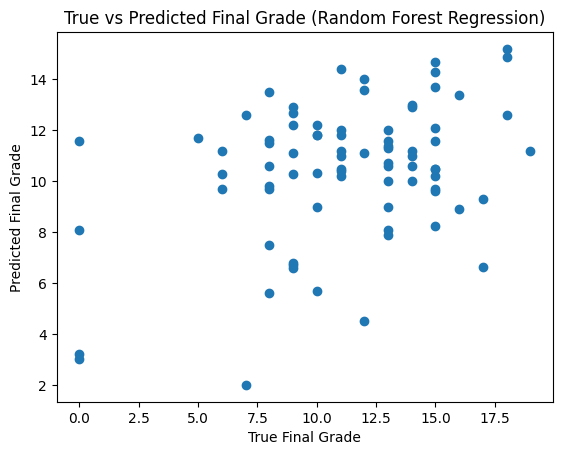

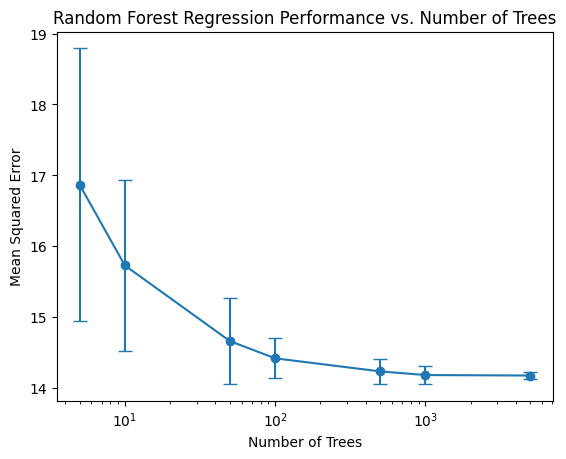

In [ ]:
import numpy as np
X = combined_df.drop(['final_grade', 'pass_fail'], axis=1)  # Predictor variables
y = combined_df['final_grade']  # Response variable
# 5(a)- Dividing the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 5(b) - estimators are 10
rf_model = RandomForestRegressor(n_estimators=10, random_state=101)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
y_pred = rf_model.predict(X_test)
# 5(c)
# Creating a scatter plot for y_testa and y_pred to understand the relationship or how close they are
plt.scatter(y_test, y_pred)
plt.xlabel('True Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('True vs Predicted Final Grade (Random Forest Regression)')
plt.show()
# 5(d)
# Function to evaluate model performance for different numbers of trees
def evaluate_rf_model(n_trees):
    mse_values = []

    for _ in range(20):  # Repeating 20 times with different random states
        rf_model = RandomForestRegressor(n_estimators=n_trees, random_state=np.random.randint(1000))
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        mse_values.append(mean_squared_error(y_test, y_pred)) # calculates MSE

    return np.mean(mse_values), np.std(mse_values)

# Evaluating performance for different numbers of trees- checks the performance
num_trees_list = [5, 10, 50, 100, 500, 1000, 5000]
mean_mse_values = []
std_mse_values = []

for num_trees in num_trees_list:
    mean_mse, std_mse = evaluate_rf_model(num_trees)
    mean_mse_values.append(mean_mse) # appending values to the empty list
    std_mse_values.append(std_mse) # appending values to std_mse

# Creating a plot
plt.errorbar(num_trees_list, mean_mse_values, yerr=std_mse_values, fmt='o-', capsize=5) # The fmt='o-' specifies the format of the line and markers (circles connected by a line), and capsize=5 sets the length of the error bar caps.
plt.xscale('log')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Regression Performance vs. Number of Trees')
plt.show()

# 5(e)- Fitting the model with different random states helps us deal with the randomness in how the random forest is set up. The randomness comes from how the model selects subsets of features and data during training. By trying out different random setups, we get a better overall sense of how well the model performs, making sure our conclusions are not too dependent on a single random setup. This way, we ensure our understanding of the model's performance is solid and not overly influenced by a particular random starting point


Inference: b)The top three featues of the highest importance are absences, failures and freetime.
When we look at how two different models analyze the factors affecting student success, we notice some similarities and differences. Both the random forest and logistic regression models agree that things like 'absences' and 'failures' play a crucial role. However, the random forest model suggests that additional factors like 'freetime,' 'goout,' 'famrel,' and 'studytime' are also important. On the other hand, the logistic regression model, which carefully selected predictors using AIC, focuses on variables such as 'large_family,' 'activities,' 'romantic,' 'paid,' 'internet,' and 'lives_in_city.'

c) The scatter plot between true or Predicted Final grade is positive. The trend is increasing.

d)The plot shows how the mean squared error (MSE) of a random forest regression model changes as the number of trees in the forest increases. The MSE is a measure of how well the model fits the training data. A lower MSE indicates a better fit.

The plot shows that the MSE generally decreases as the number of trees increases. This suggests that adding more trees to the forest improves the model's fit to the data. However, there is a point at which the MSE starts to increase again. This is because adding too many trees to the forest can lead to overfitting, which occurs when the model learns the training data so well that it is unable to generalize to new data.

Question 6:
Clustering algorithms to identify different student groups

(a) Perform a k-means cluster analysis, using the indicators as the features. Run the clustering algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for this data.

(b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables.
(Hint: Create histograms for each variable, with the data separated by cluster.)

(c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings. Do your findings support the claim that multiple categories of students, with distinctly different characteristics, are included in this dataset?

(d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster analysis.
(See https://scikit-learn.org/stable/modules/clustering.html for an overview of other clustering algorithms.)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


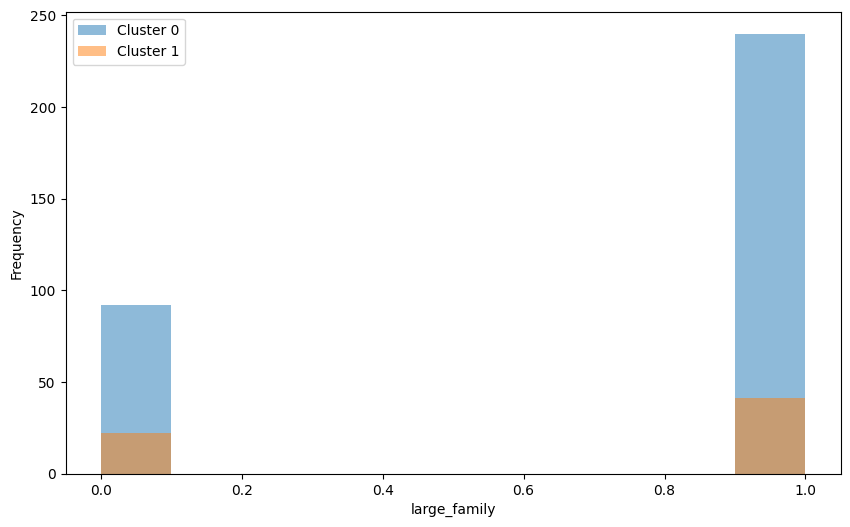

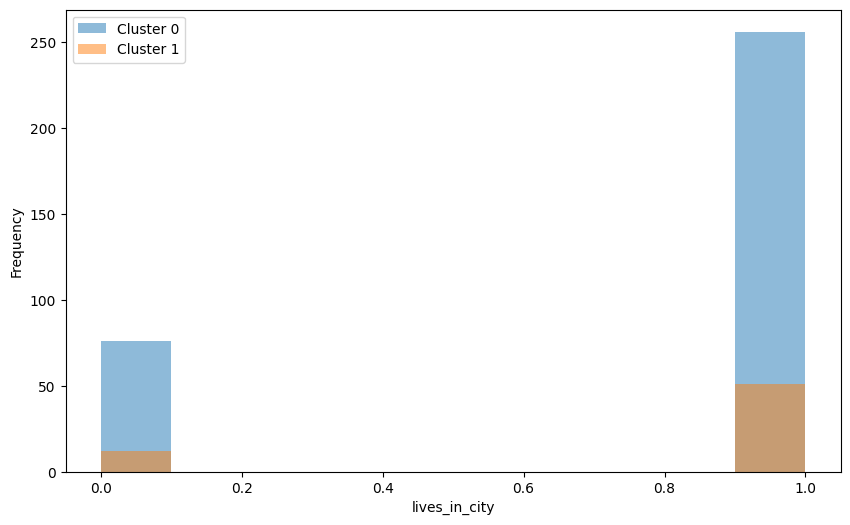

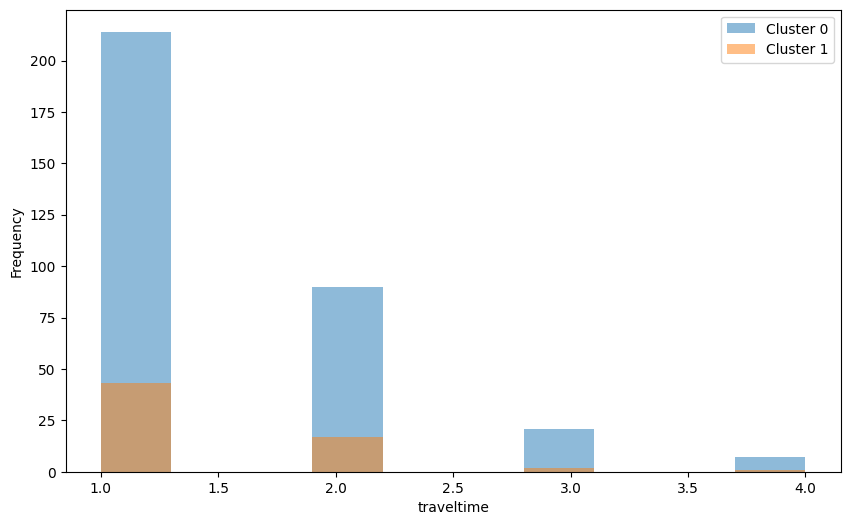

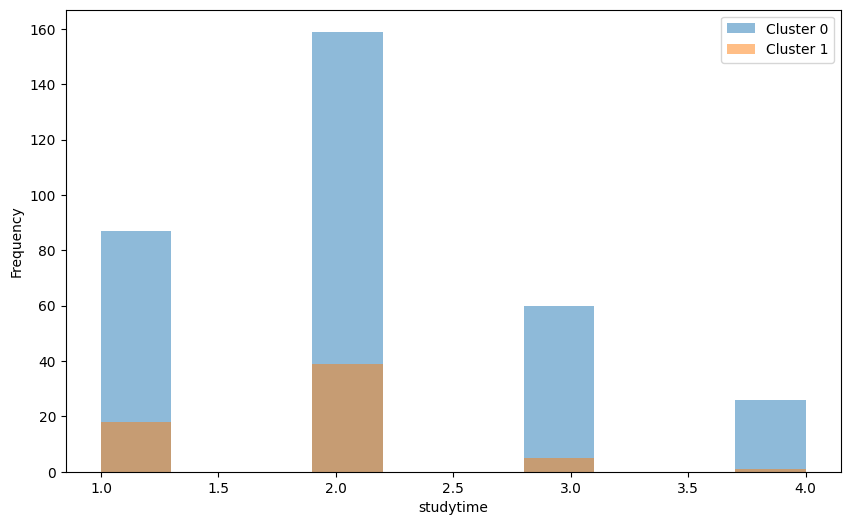

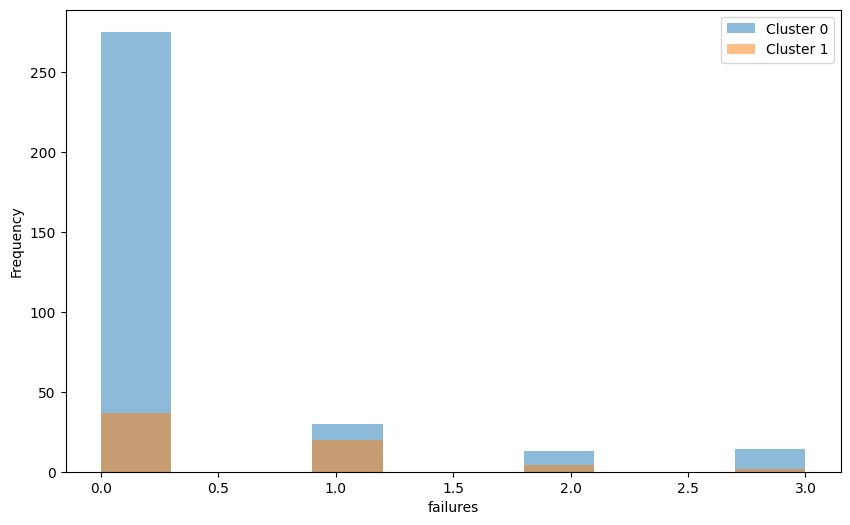

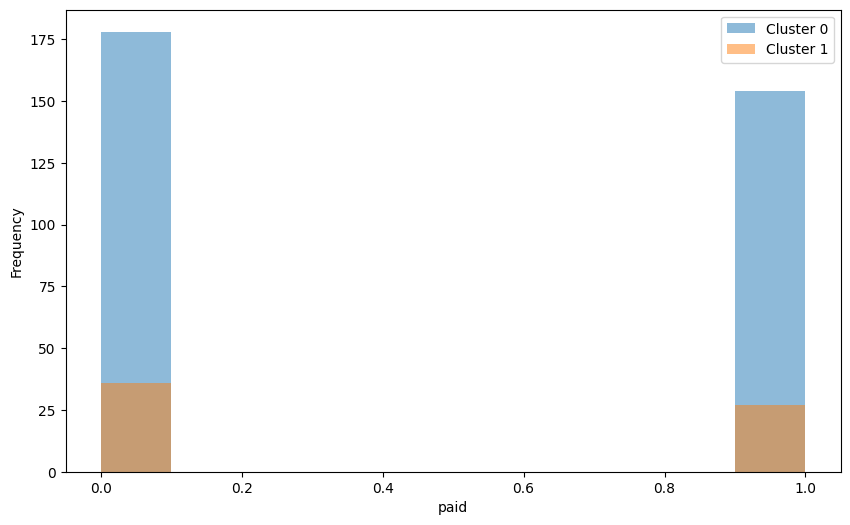

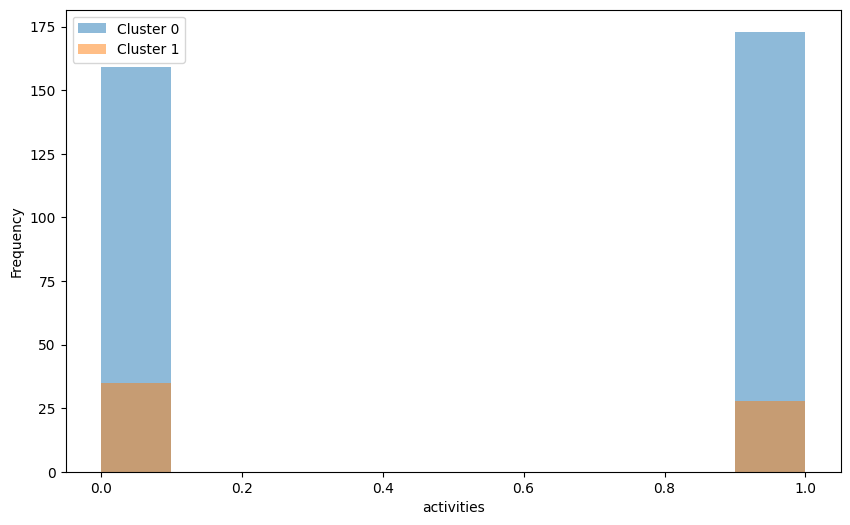

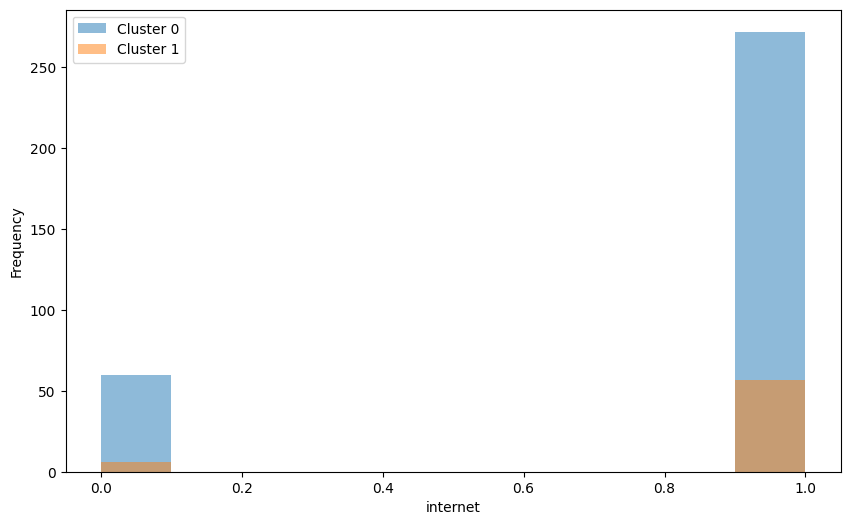

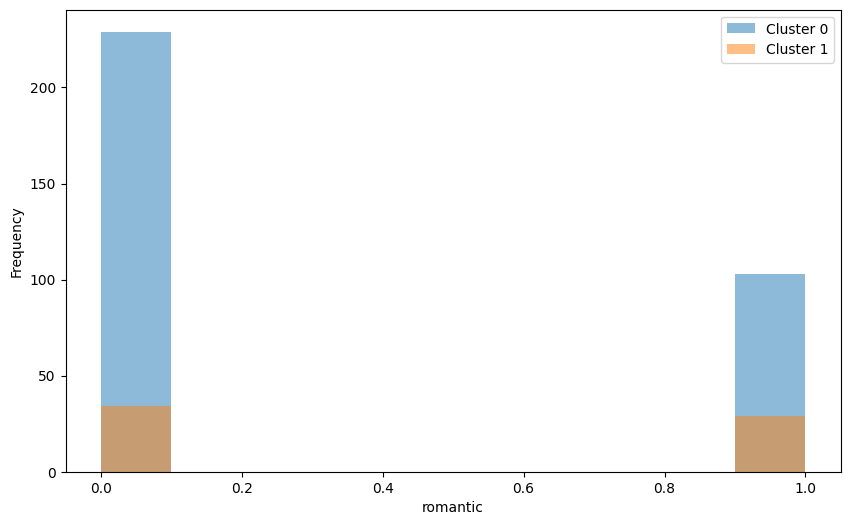

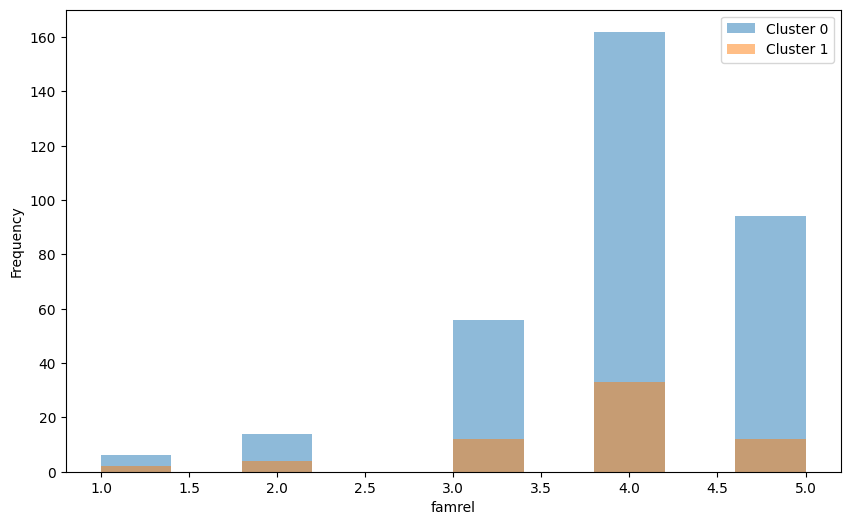

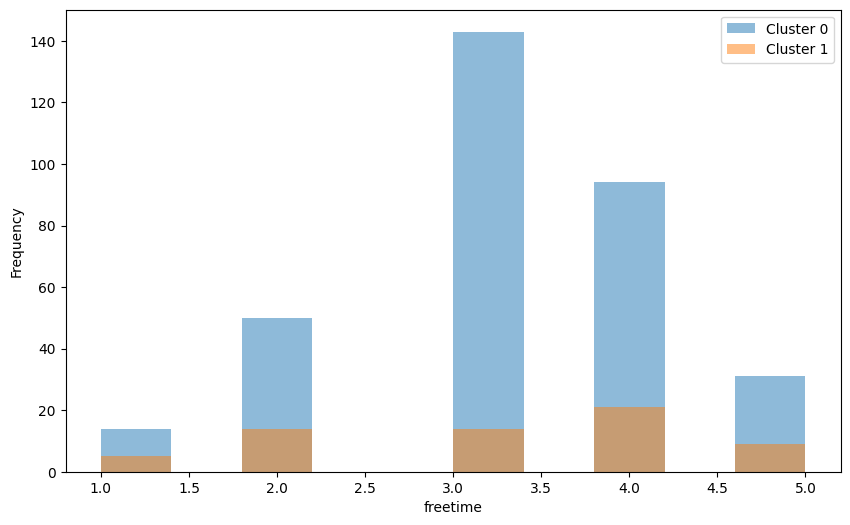

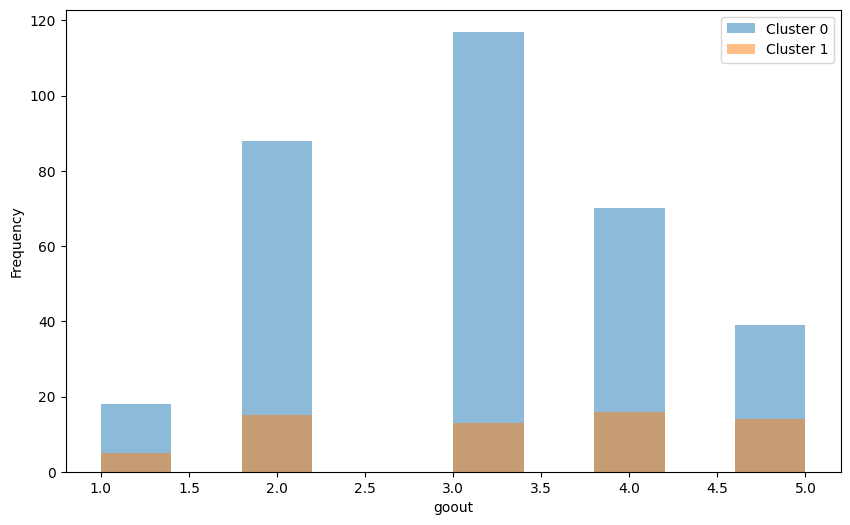

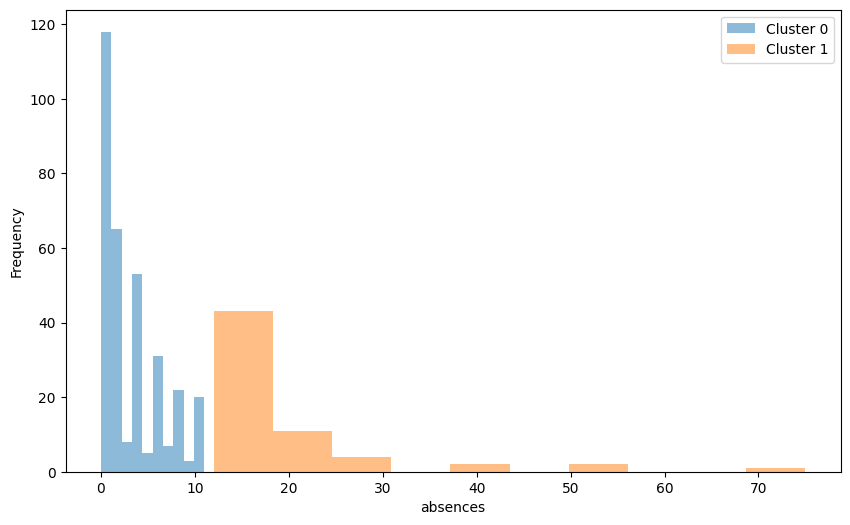

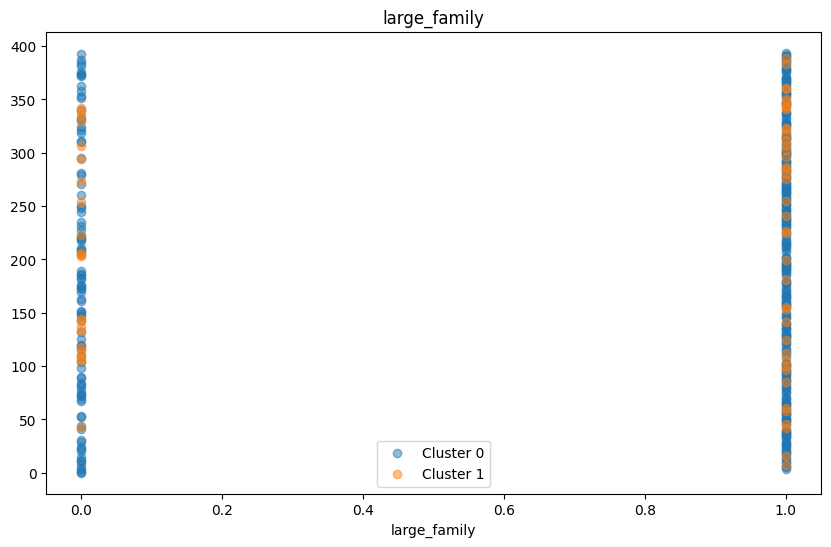

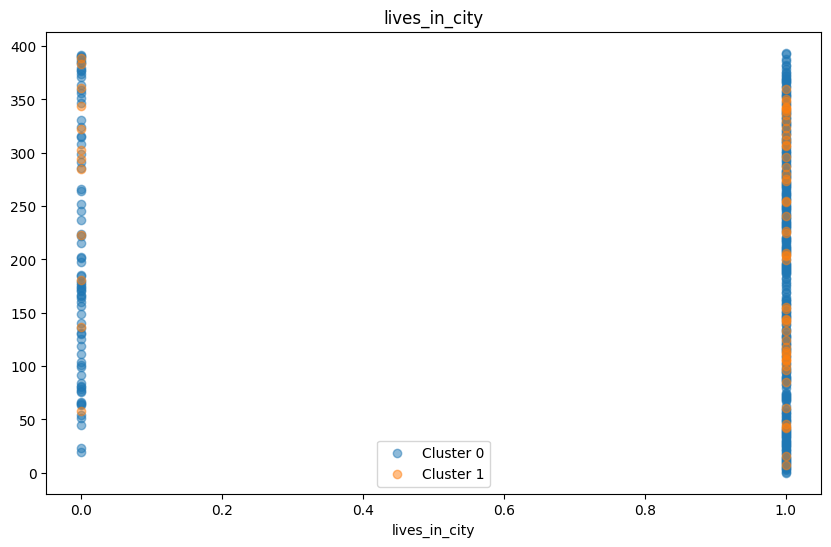

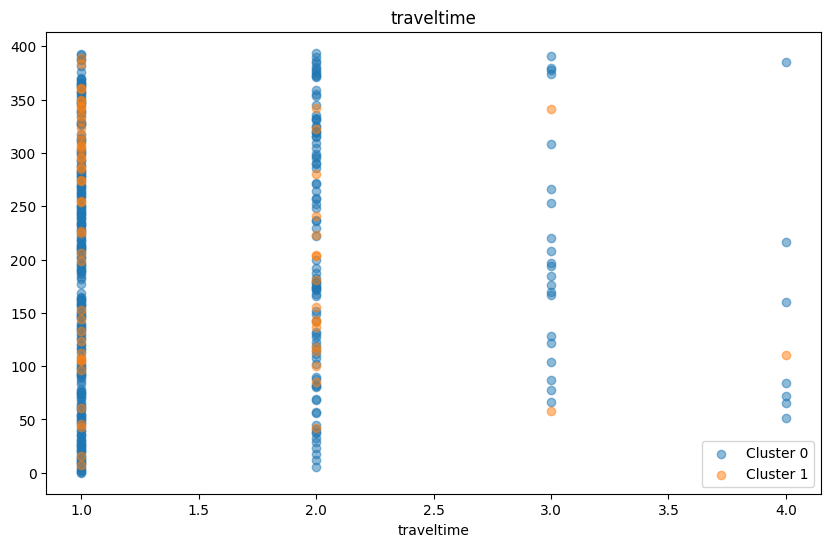

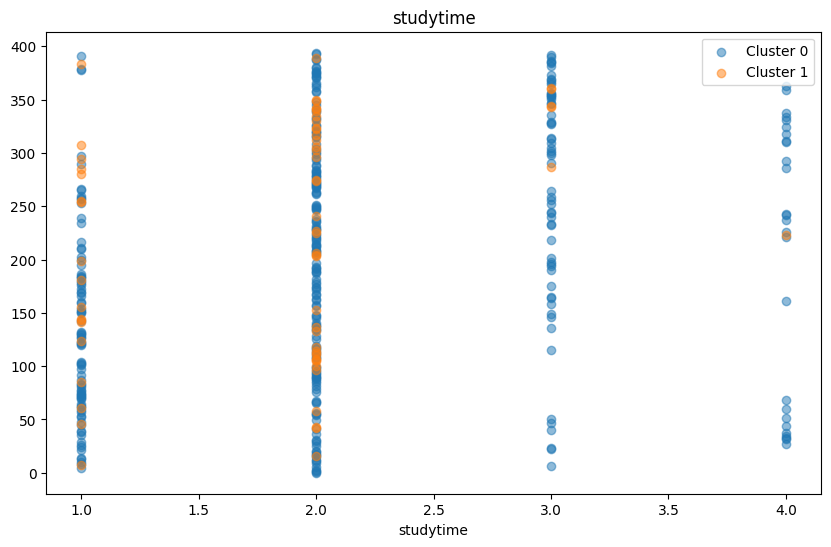

In [ ]:

# 6(a)
# Initializing lists to store average silhouette scores for each variable
average_silhouette_scores = []

# Running k-means for different numbers of clusters (2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Calculating silhouette scores for each variable
    variable_silhouette_scores = silhouette_score(X, kmeans.labels_, metric='euclidean')

    # Calculating average silhouette score across all variables
    average_silhouette_scores.append(np.mean(variable_silhouette_scores))
# 6(b)
# Identifying the optimal number of clusters based on silhouette score
optimal_clusters = average_silhouette_scores.index(max(average_silhouette_scores)) + 2
print(f'Optimal number of clusters: {optimal_clusters}')

# Running k-means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(X)

# Creating histograms for each variable, separated by cluster
for column in X.columns:
    plt.figure(figsize=(10, 6))
    for i in range(optimal_clusters):
        plt.hist(X[clusters_optimal == i][column], alpha=0.5, label=f'Cluster {i}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
# 6(c)
# Identifying the most discriminatory variables
variable_ranking = np.argsort(-np.array(average_silhouette_scores))
most_discriminatory_variables = X.columns[variable_ranking][:4]  # top 4 variables

# Creating scatter plots colored by cluster number for the most discriminatory variables
for variable in most_discriminatory_variables:
    plt.figure(figsize=(10, 6))
    for i in range(optimal_clusters):
        plt.scatter(X.iloc[clusters_optimal == i][variable],
                    X.iloc[clusters_optimal == i].index,
                    label=f'Cluster {i}', alpha=0.5)
    plt.title(f'{variable}')
    plt.xlabel(variable)
    plt.legend()
    plt.show()




Inference:
6 b) The optimal number of clusters in K means is 2 . The most discrimatory variables are studytime, lives_in_the_city, large_family and travel time.
6 c)
# studytime
Cluster 0 may represent students who are less motivated to study, or who have more extracurricular activities or other commitments.
Cluster 1 may represent students who are more motivated to study, or who are taking more challenging courses.
The wide range of study times in Cluster 0 may suggest that these students are still trying to figure out their best study habits, or that they have different learning styles.
The concentrated range of study times in Cluster 1 may suggest that these students have already found a study routine that works for them.

# travel time:
The plot shows that there are two distinct groups of students based on their travel times. Cluster 0 contains students who travel less than 2 hours, while Cluster 1 contains students who travel more than 2 hours. This suggests that there are two different types of students, those who live close to school and those who live farther away.

This information could be used by schools to develop more targeted transportation solutions for their students. For example, schools could provide more shuttle buses for students who live farther away, or they could partner with local transit agencies to offer discounted fares.

# lives_in_the_city:
Cluster 0 may represent students who come from a variety of backgrounds, including urban, rural, and suburban areas.
Cluster 1 may represent students who come from a more homogenous background, such as students who all live in urban areas.
The wide range of lives in city in Cluster 0 may suggest that these students are still trying to figure out where they want to live, or that they have different preferences for where they want to live.
The concentrated range of lives in city in Cluster 1 may suggest that these students have already found a place to live that they are happy with.

The findings support the claim that multiple categories of students, with distinctly different characteristics, are included in this dataset

# 6(d)
Agglomerative Clustering represents a hierarchical approach to clustering, wherein data points or clusters are systematically combined based on their proximity. The process commences with each data point forming an independent cluster, and through successive iterations, the two closest clusters are fused until a predefined number of clusters is attained.

This clustering method proves advantageous in situations where the exploration of hierarchical relationships among data points is pivotal, enabling the investigation of both overall and localized structures inherent in the dataset. One notable feature is its ability to operate without a predetermined cluster count, providing adaptability to capture the inherent grouping patterns present in the data. Furthermore, Agglomerative Clustering exhibits proficiency in accommodating clusters that are non-spherical and possess irregular shapes, making it well-suited for datasets characterized by diverse and intricate structures.

Optimal number of clusters (Agglomerative): 2


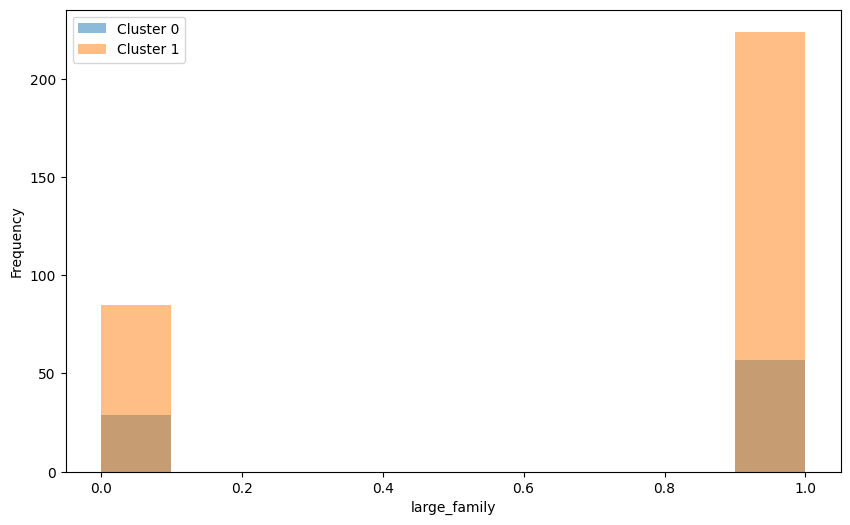

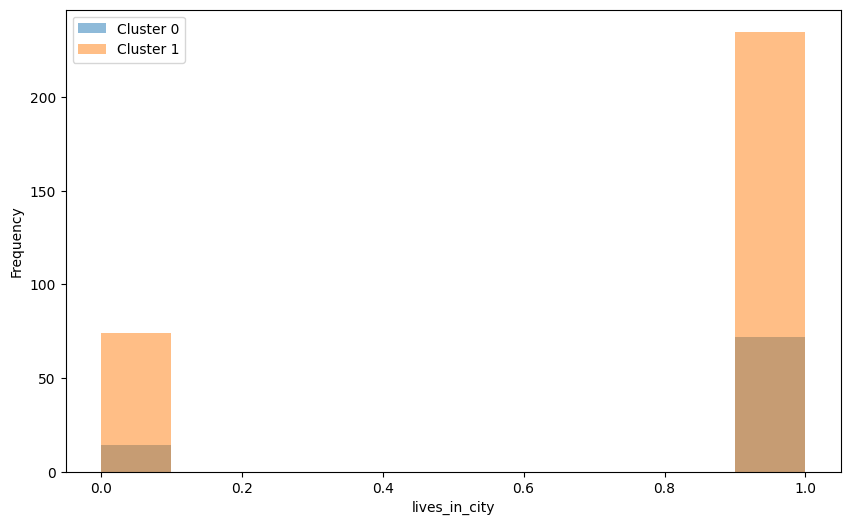

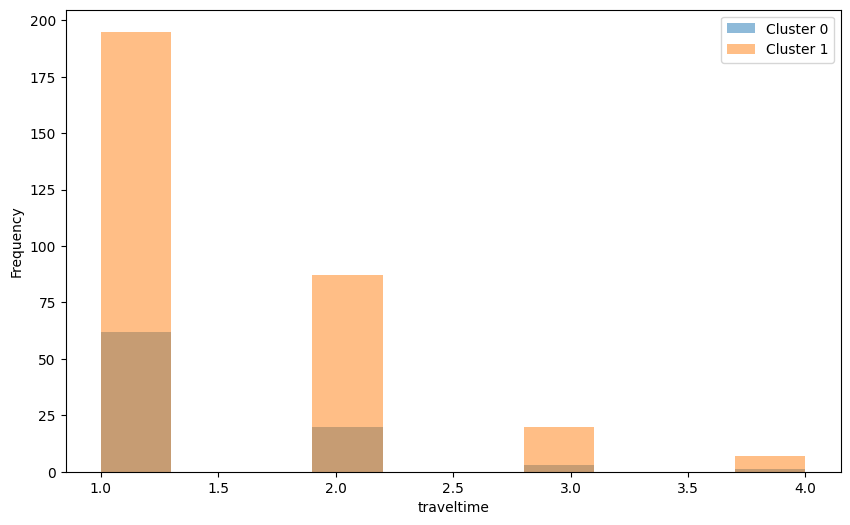

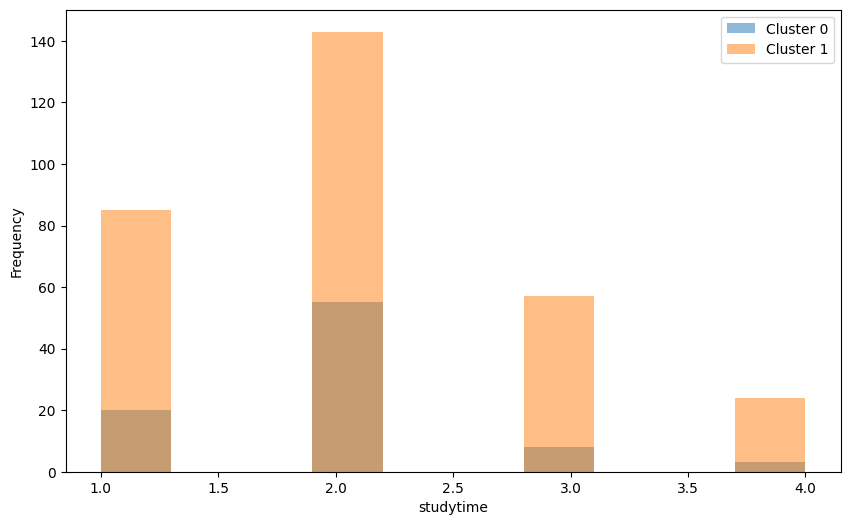

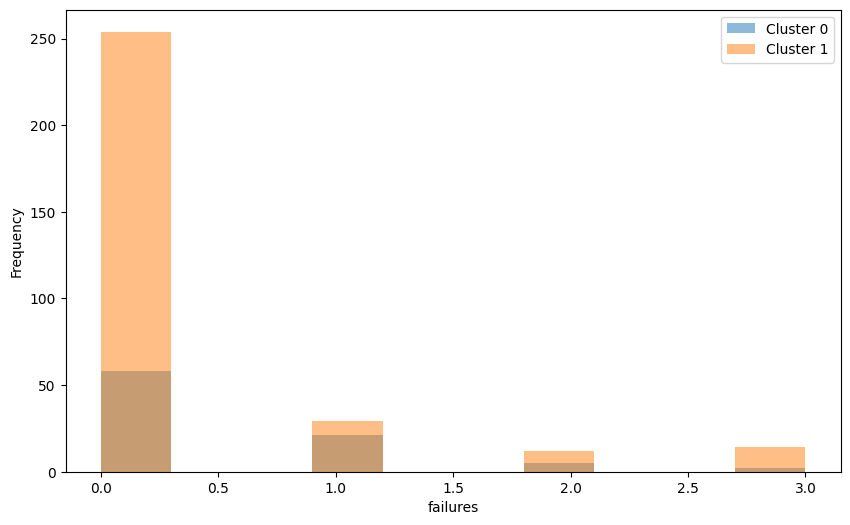

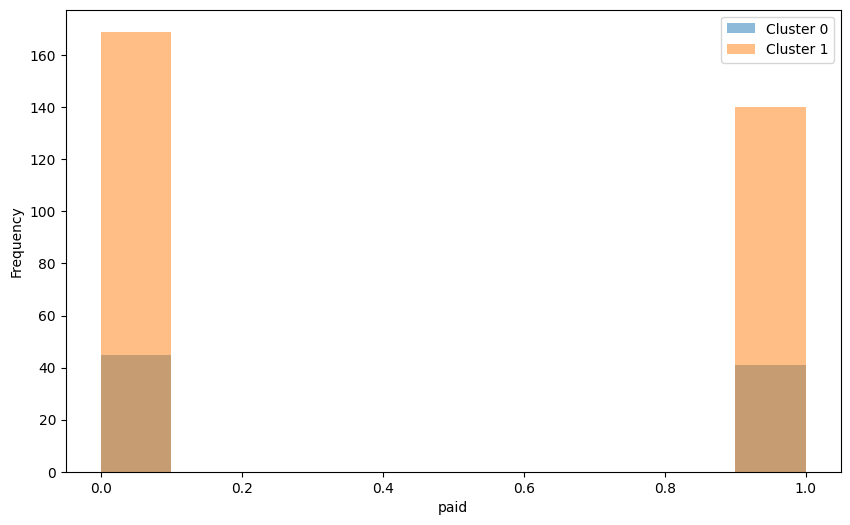

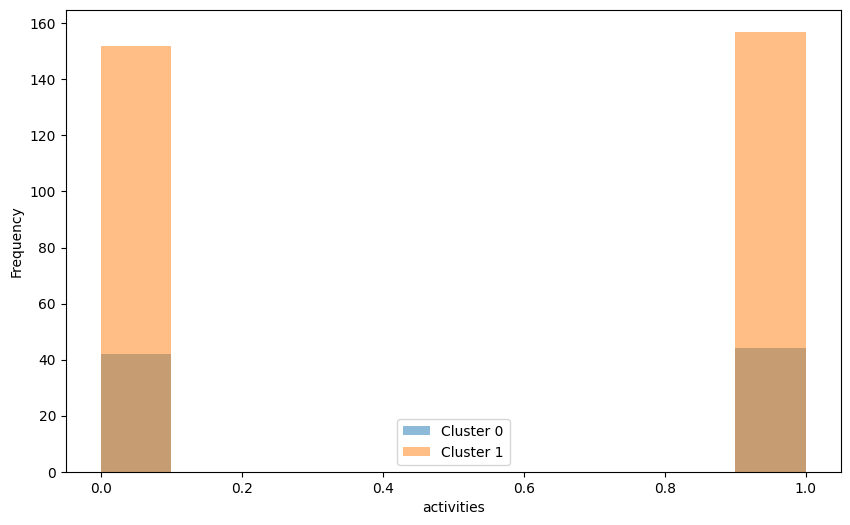

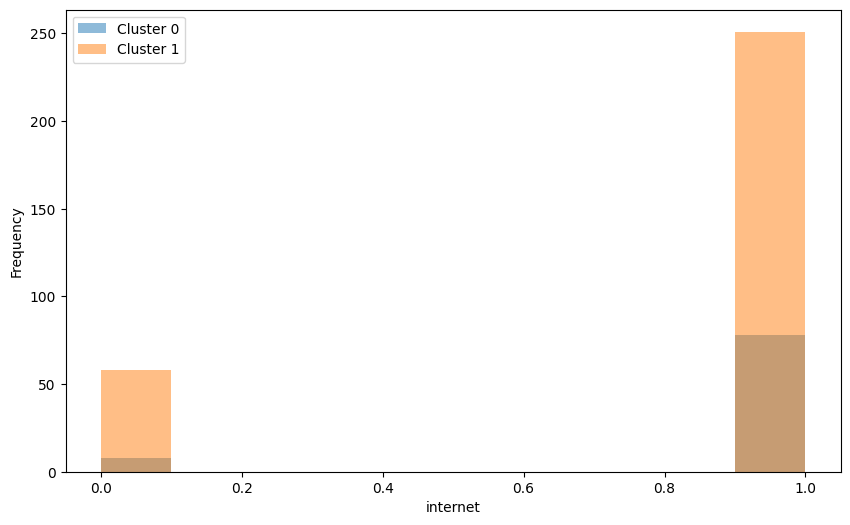

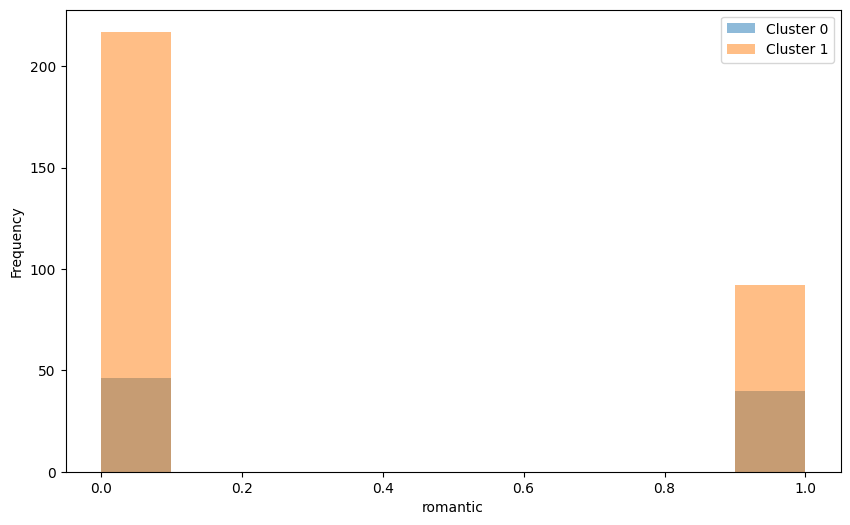

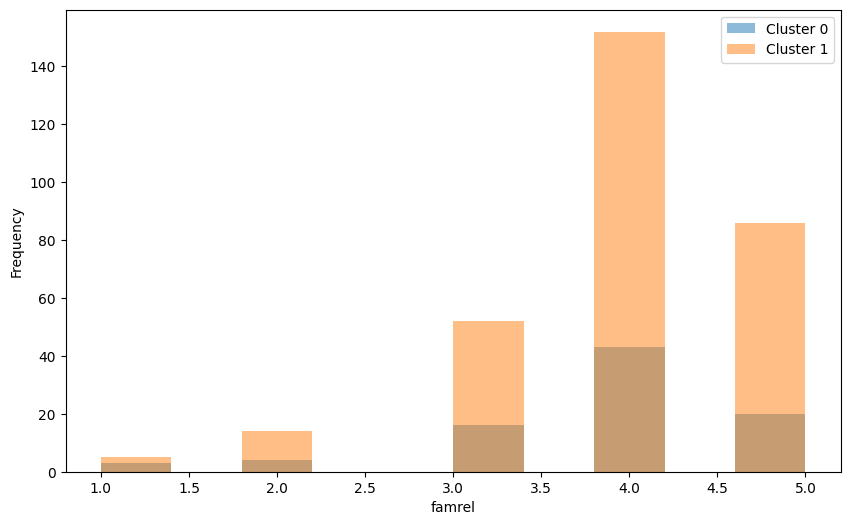

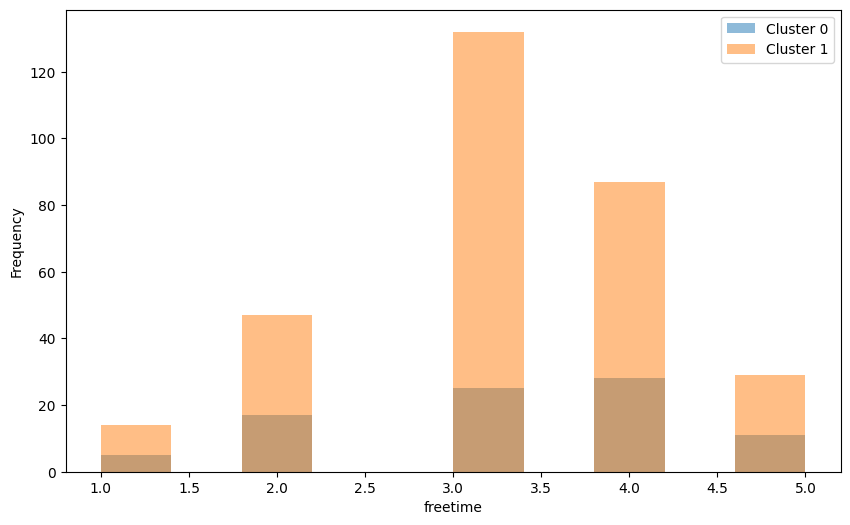

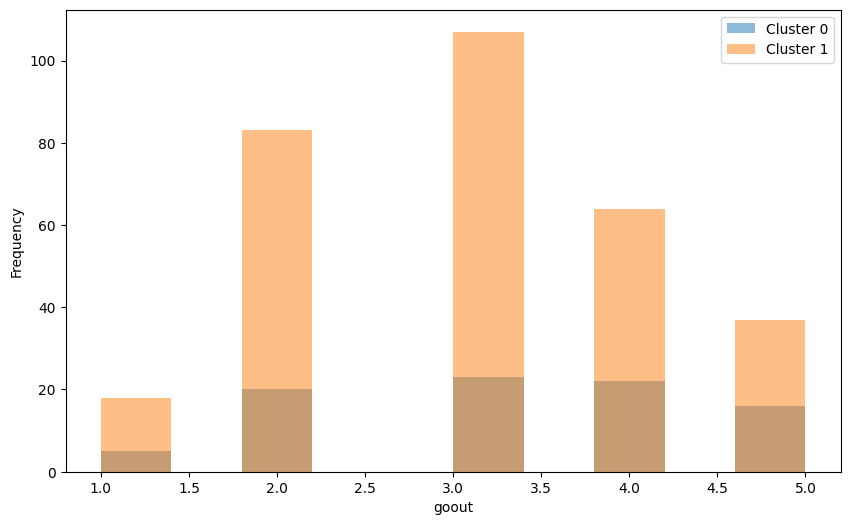

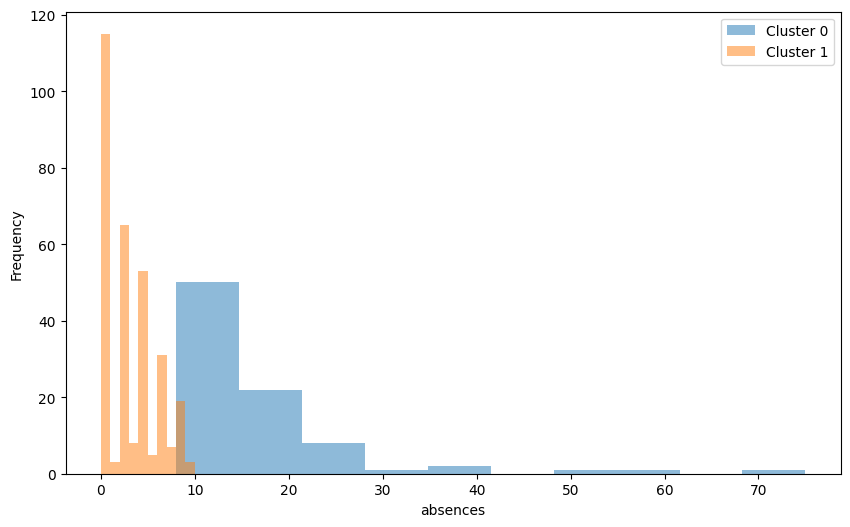

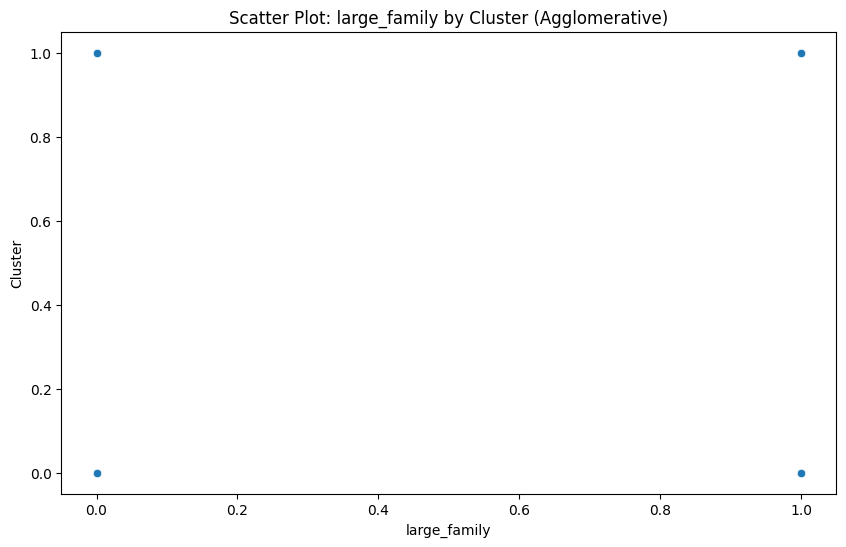

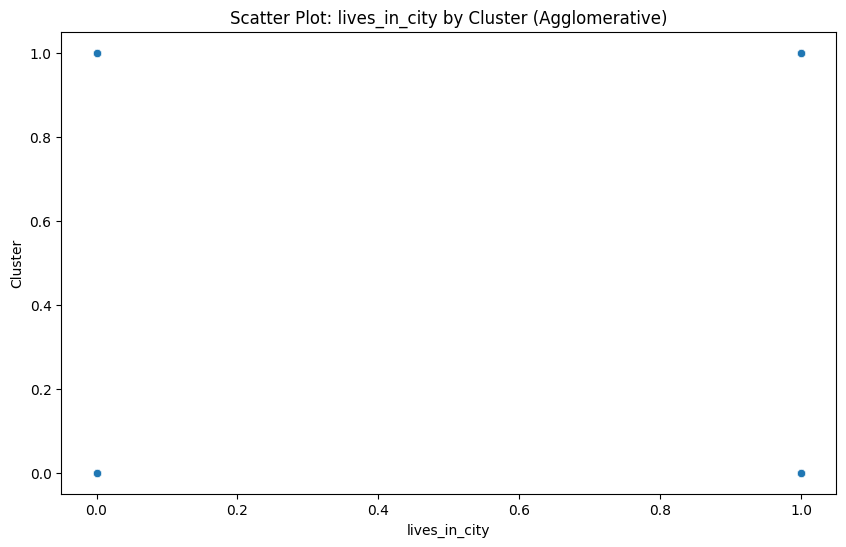

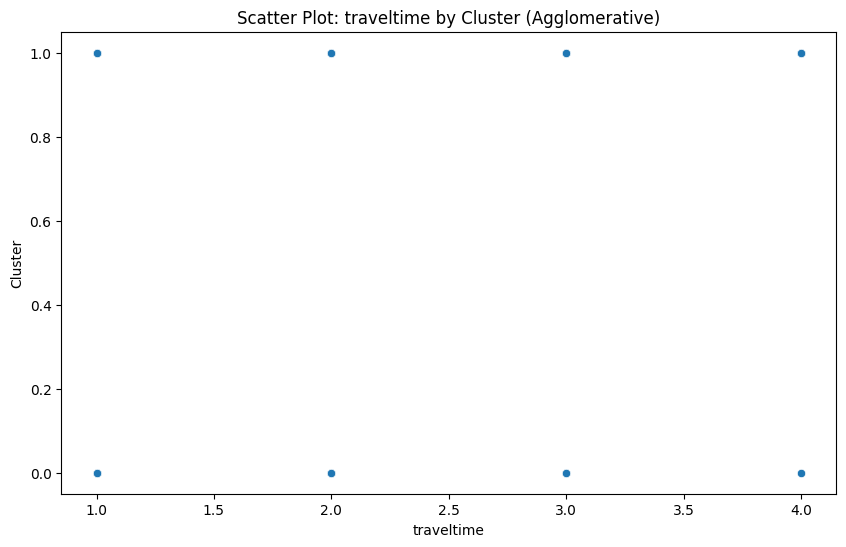

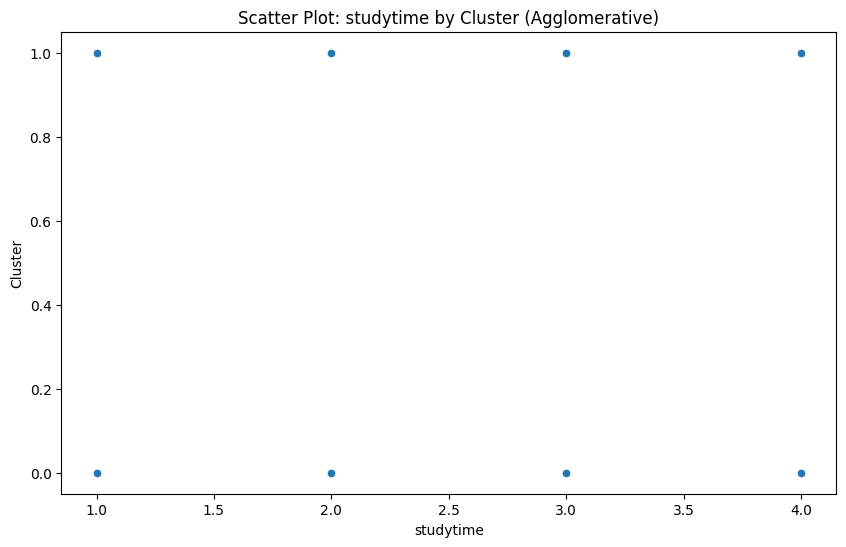

In [ ]:
# 6(d)
#Initializing - a list to store average silhouette scores for each variable
average_silhouette_scores_agg = []

# Running Agglomerative clustering for different numbers of clusters (2 to 10)- repeating steps done above on agglomerative clustering
for k in range(2, 11): # for loop declaration
    agg = AgglomerativeClustering(n_clusters=k)
    labels_agg = agg.fit_predict(X)
    silhouette_scores_agg = silhouette_score(X, labels_agg, metric='euclidean')
    average_silhouette_scores_agg.append(np.mean(silhouette_scores_agg))

# Identifying the optimal number of clusters based on silhouette score for Agglomerative
optimal_clusters_agg = average_silhouette_scores_agg.index(max(average_silhouette_scores_agg)) + 2 #In hierarchical clustering, the minimum number of clusters is 2 because every point starts in a separate cluster, and clusters are successively merged.
print(f'Optimal number of clusters (Agglomerative): {optimal_clusters_agg}')

# Running Agglomerative Hierarchical Clustering with the optimal number of clusters we found above
agg_optimal = AgglomerativeClustering(n_clusters=optimal_clusters_agg)
labels_agg_optimal = agg_optimal.fit_predict(X)

# Creating histograms for each variable, separated by cluster.
for column in X.columns:
    plt.figure(figsize=(10, 6))
    for i in range(optimal_clusters_agg):
        plt.hist(X[labels_agg_optimal == i][column], alpha=0.5, label=f'Cluster {i}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Identifying the most discriminatory variables for Agglomerative clustering - Identifying the most discriminatory variables for Agglomerative clustering refers to the process of determining which variables or features contribute the most to the differences observed between clusters in the context of Agglomerative Hierarchical Clustering.
variable_ranking_agg = np.argsort(-np.array(average_silhouette_scores_agg))
most_discriminatory_variables_agg = X.columns[variable_ranking_agg][:4]

# Creating scatter plots for the most discriminatory variables, colored by cluster for Agglomerative clustering
for variable in most_discriminatory_variables_agg:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pd.DataFrame({'Variable': X[variable], 'Cluster': labels_agg_optimal}),
                    x='Variable', y='Cluster')
    plt.title(f'Scatter Plot: {variable} by Cluster (Agglomerative)')
    plt.xlabel(variable)
    plt.ylabel('Cluster')
    plt.show()



Inference for 6 (c)- Common: If the optimal number of clusters is greater than 1, it suggests that the data can be naturally grouped into distinct categories.
In our case, both K-means and Agglomerative clustering were performed with multiple clusters, indicating that the data can be segmented into different groups.
6(d)
Both the clustering techniques have same discriminatory variables.But one thing that is common is both of these techniques have distinct variation between two clusters.